In [79]:
%matplotlib inline

import pandas as pd
from scipy import stats  
from torch_rl.stats import RLTrainingStats
df = RLTrainingStats.load('/disk/users/vlasteli/no_backup/Projects/torch_rl/examples/training_stats_2018-02-07 10:18:16.741426')


In [67]:
df

,epsilon,mvavg_reward,reward
episode,,,
0,0.996,-136.000000,-136
1,0.992,-168.000000,-200
2,0.988,-142.666667,-92
3,0.984,-131.500000,-98
4,0.980,-142.000000,-184
5,0.976,-151.666667,-200
6,0.972,-155.142857,-176
7,0.968,-158.250000,-180
8,0.964,-158.888889,-164


/fzi/ids/vlasteli/no_backup/miniconda2/envs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=400,center=False).mean()
  """
/fzi/ids/vlasteli/no_backup/miniconda2/envs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=300,center=False).mean()
  """
/fzi/ids/vlasteli/no_backup/miniconda2/envs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=200,center=False).mean()
  """
/fzi/ids/vlasteli/no_backup/miniconda2/envs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace 

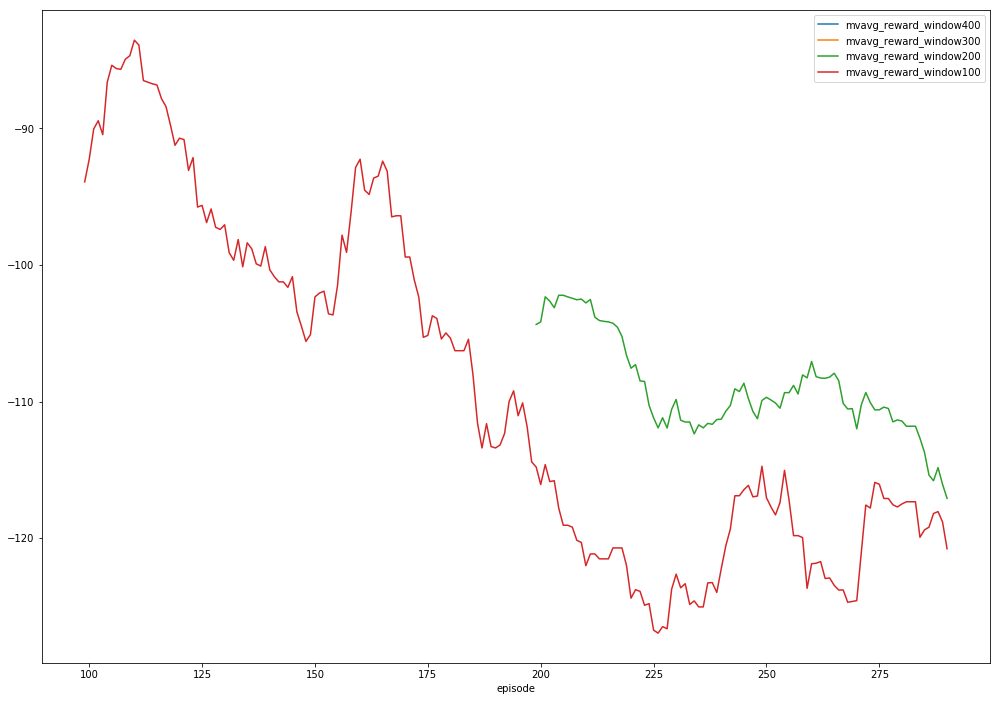

In [80]:
mean_windows = [400,300,200,100]
keys = []
for w in mean_windows:
    key= 'mvavg_reward_window' + str(w)
    df[key] = pd.rolling_mean(df['reward'], window=w)
    keys.append(key)
df.plot(y=keys, figsize=(17,12))


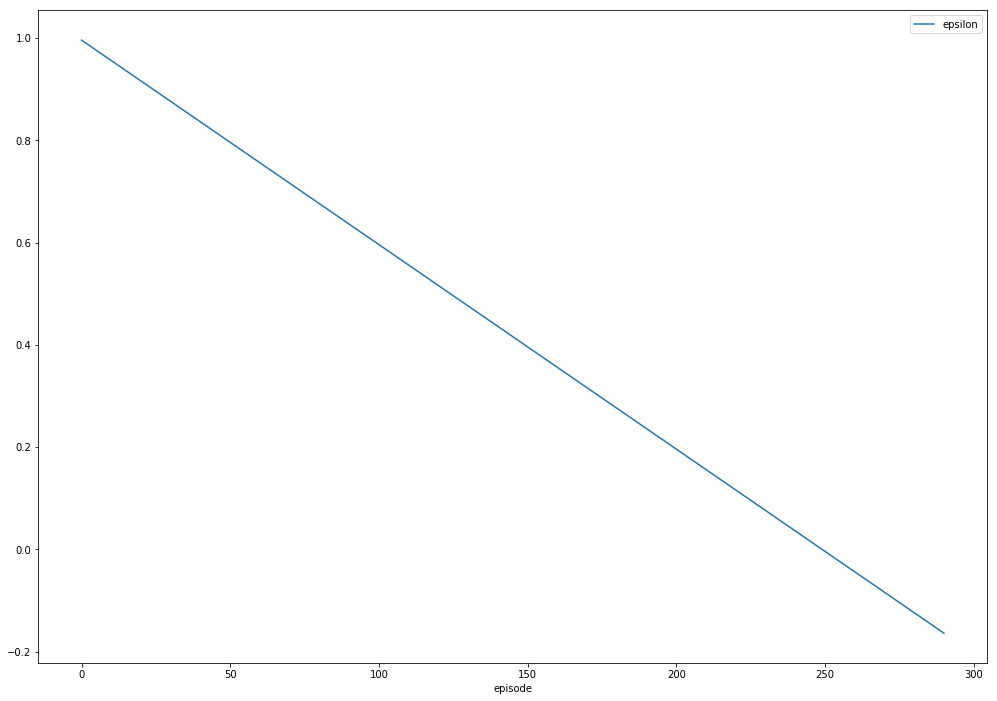

In [81]:
mean_windows = [400,300,200,100]
keys = []
df.plot(y='epsilon', figsize=(17,12))


In [23]:
df = df_spiking.join(df_reservoir, rsuffix='_reservoir')

In [6]:
df1 = df_spiking[1000:9000]
df2 = df_spiking[3000:11000]

/fzi/ids/vlasteli/no_backup/miniconda2/envs/ai/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


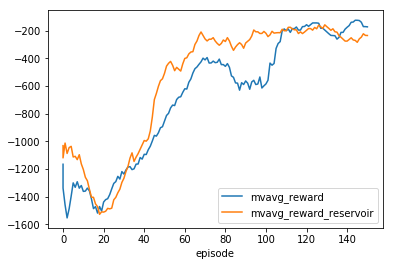

#  Mann-Whitney-Wilcoxon (MWW) RankSum test

The MWW RankSum test is a useful test to determine if two distributions are significantly different or not. Unlike the t-test, the RankSum test does not assume that the data are normally distributed, potentially providing a more accurate assessment of the data sets.

If P < 0.05 the distributions significantly differ.

In [8]:
z_stat, p_val = stats.ranksums(df1['mvavg_reward'], df2['mvavg_reward'])  
  
print("MWW RankSum P =", p_val)  

MWW RankSum P for treatments 1 and 2 = 0.0032747983550358733


# T-test

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores.

In [9]:
z_stat, p_val = stats.ttest_ind(df1['mvavg_reward'], df2['mvavg_reward'])  
  
print("T-test P =", p_val)  

T-test P = 0.010933181180549435
